In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from time import time
import cv2
import urllib

In [27]:
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype=np.uint8)
    image = cv2.imdecode(image, -1)
 
    return image

def label_para_pixel(bloco, labels, l, a):
    dimensao = bloco.shape[1]
    imagem = np.zeros((l, a, dimensao))
    index = 0
    for i in range(l):
        for j in range(a):
            imagem[i][j] = bloco[labels[index]]
            index += 1
    return imagem

def retorna_kmeans(n_cores, img_url):
    
    img_url = url_to_image(img_url)
#     img = cv2.imread(img_url)
    img = cv2.cvtColor(img_url, cv2.COLOR_BGR2RGB)

    img = np.array(img, dtype = np.float64) / 255

    w, h, d = tuple(img.shape)
    assert d == 3
    image_array = np.reshape(img, (w * h, d))

    kmeans = KMeans(n_clusters = n_cores, random_state = 0).fit(image_array)
    labels = kmeans.predict(image_array)

    plt.figure(1)
    ax = plt.axes([0, 0, 1, 1])
    plt.axis('off')
    plt.title('Imagem original')
    plt.imshow(img)

    plt.figure(2)
    ax = plt.axes([0, 0, 1, 1])
    plt.axis('off')
    plt.title('Imagem K-Means')
    plt.imshow(label_para_pixel(kmeans.cluster_centers_, labels, w, h))

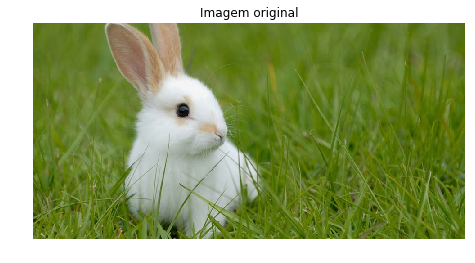

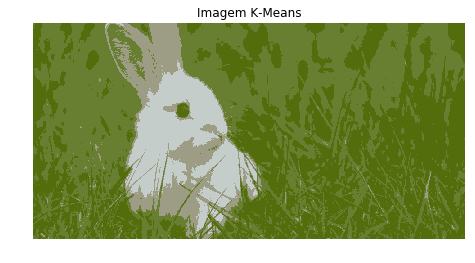

In [28]:
img_coelho = 'https://github.com/pgiaeinstein/comp_cog/raw/master/coelho.png'
img_rm = 'https://github.com/pgiaeinstein/comp_cog/raw/master/crm.jpg'

k_cores = 4

retorna_kmeans(k_cores, img_coelho)